# How do users' sentiment polarities and subjectivities vary based on the type of app (free vs. paid), and are there any significant differences in terms of the types of issues or features users tend to mention in reviews for these two types of apps? (Attributes: Type (Free/Paid), Sentiment Polarity

      Polarity  Subjectivity
Type                        
Free  0.156573      0.493934
Paid  0.227947      0.521393


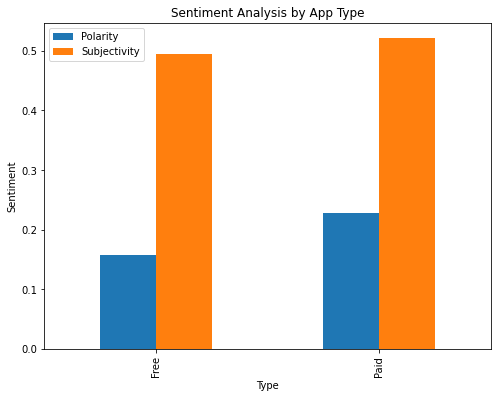

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

# Load the datasets
apps_df = pd.read_csv('C:/Users/Amina Firdouse/Desktop/masters-EA/Project/googleplaystore.csv')
reviews_df = pd.read_csv('C:/Users/Amina Firdouse/Desktop/masters-EA/Project/googleplaystore_user_reviews.csv')

# Merge the datasets based on the App column
merged = pd.merge(apps_df, reviews_df, on='App', how='inner')

# Filter out any missing values
merged.dropna(subset=['Translated_Review'], inplace=True)

# Preprocess the text data
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join([word for word in word_tokenize(text) if word not in stopwords.words('english')])
    return text

merged['Cleaned_Review'] = merged['Translated_Review'].apply(preprocess_text)
merged['Sentiment'] = merged['Translated_Review'].apply(lambda x: TextBlob(str(x)).sentiment)

merged['Polarity'] = merged['Sentiment'].apply(lambda x: x[0])
merged['Subjectivity'] = merged['Sentiment'].apply(lambda x: x[1])

# Group the data by the Type column and calculate the mean sentiment polarity and subjectivity for each type of app
grouped = merged.groupby('Type').mean()[['Polarity', 'Subjectivity']]
print(grouped)

# Plot the average sentiment polarity and subjectivity for each type of app
fig, ax = plt.subplots(figsize=(8, 6))
grouped.plot(kind='bar', ax=ax)
ax.set_title('Sentiment Analysis by App Type')
ax.set_xlabel('Type')
ax.set_ylabel('Sentiment')
plt.show()
